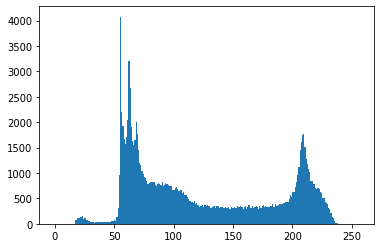

In [1]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('30(1).jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Calculate the histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

import matplotlib.pyplot as plt

# Display the histogram
plt.hist(gray.ravel(), 256, [0, 256])
##plt.show()


# Threshold the grayscale image
##ret, thresh = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)

# Apply thresholding to create a binary image
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)


# Find contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# print(contours[0])

In [2]:
# import cv2
# import numpy as np

# # Load the image
# img = cv2.imread('35(1).jpg')

# # Convert the image to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # Calculate the histogram
# hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# import matplotlib.pyplot as plt

# # Display the histogram
# plt.hist(gray.ravel(), 256, [0, 256])
# ##plt.show()


# # Threshold the grayscale image
# ##ret, thresh = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)

# # Apply thresholding to create a binary image
# _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)


# # Find contours in the binary image
# contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Set the minimum width and height for the bounding rectangles
min_width, min_height = 50, 50

# Iterate through the contours and draw a bounding rectangle around each one
for contour in contours:
    x, y, w, h = cv2.boundingRect(contours[0])
    if w > min_width and h > min_height:
        # Draw the bounding rectangle on the image
        cv2.rectangle(gray, (x, y), ((x+ w), y + h), (255,255,255), 2)
        break

# Add text to the bounding rectangle
text = 'CYLONE DETECTED'
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
thickness = 2
text_size, _ = cv2.getTextSize(text, font, font_scale, thickness)
text_x = x + int((w - text_size[0]) / 2)
text_y = y - int(text_size[1] * 1.5)

color = 2**16-1  # 65535 is white color for 16 bis image

# Using cv2.putText() method
image = cv2.putText(gray,text,(text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX,font_scale , color, 1, cv2.LINE_AA)


# Show the image with the bounding rectangles
cv2.imshow('Image with Bounding Rectangles', gray)
cv2.waitKey(0)


-1